# Assessing Online Ad Clicks for Significance

## Problem Statement

Fred, my good friend, recently opened a burger bistro in Brisbane, but business hasn’t picked up as quickly as he’d hoped. To draw in new customers, Fred is planning an online advertising campaign aimed at Brisbane residents. Every weekday, from 11:00 a.m. to 1:00 p.m., he’s going to purchase 3,000 ads that will be shown to people in the area. Each ad reads, “Hungry? Try the Best Burger in Brisbane. Come to Fred’s.” Clicking on the ad will take people directly to Fred’s website. Each ad costs Fred one cent, but he’s confident that the investment will eventually pay off.

As Fred prepares for his campaign, he runs into a problem. When previewing the ad, he notices that the text is displayed in blue, and he’s not impressed with the color—he thinks it’s too boring. Fred suspects that changing the color might increase clicks. Fortunately, his advertising platform allows him to choose from 30 different text colors, and Fred is curious to see if another color could outperform blue in terms of click-throughs. So, he decides to test it out.

Fred sets up an experiment. Every weekday for a month, he runs 3,000 ads, randomly assigning each one a different color from the available 30. This means that 100 ads of each color are shown to 100 people daily. For instance, 100 people will see a blue ad, and 100 will see a green ad, with the total 3,000 ads evenly distributed across the 30 colors. Fred’s ad software tracks the number of daily views and clicks for each color, organizing the data into a table that links views and clicks to the specific color of each ad.

By the end of the month, Fred has collected data from 20 weekdays, all sorted by color. Now, he wants to know if any of the colors resulted in significantly more clicks than blue. However, being more of a burger master than a data expert, Fred is unsure how to interpret the data. He’s not sure which click differences are meaningful and which might just be random variation. That’s where I come in—Fred has asked me to analyze the data and determine if there’s a color that performs better than blue. If I can help him figure this out, Fred’s promised me free burgers for an entire year!

Let’s get started on analyzing the data!

## Data Description

Fred’s ad-click data is stored in the file colored_ad_click_table.csv. The .csv file extension is an acronym for comma-separated values. Our .csv file is a table stored as text. The table columns are separated by commas. The first line in the file contains the comma- separated labels for the columns. The first 99 characters of that line are `Color,Click Count: Day 1,View Count: Day 1,Click Count: Day 2,View Count: Day 2,Click Count: Day 3`,.

Let’s briefly clarify the column labels:

- Column 1: *Color*
    - Each row in the column corresponds to one of 30 possible text colors.
- Column 2: *Click Count: Day 1*
    - The column tallies the times each colored ad was clicked on day 1 of Fred’s
experiment.
- Column 3: *View Count: Day 1*
    - The column tallies the times each ad was viewed on day 1 of Fred’s experiment.
    - According to Fred, all daily views are expected to equal 100.
- The remaining 38 columns contain the clicks per day and views per day for the other 19 days of the experiment.

The data can be found in [Kaggle](https://www.kaggle.com/datasets/wangjunshen/colored-ad-click-table?resource=download)

## Data Loading and Processing

First, I’ll import the essential libraries that are commonly used in data analysis. These will help me load, manipulate, visualize, and analyze the data efficiently.

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt 
import seaborn as sns

I’ll inspect the data using command-line tools to determine the most suitable parameters to use when loading it with pd.read_csv.

In [3]:
! head -n 5 ./colored_ad_click_table.csv 

Color,Click Count: Day 1,View Count: Day 1,Click Count: Day 2,View Count: Day 2,Click Count: Day 3,View Count: Day 3,Click Count: Day 4,View Count: Day 4,Click Count: Day 5,View Count: Day 5,Click Count: Day 6,View Count: Day 6,Click Count: Day 7,View Count: Day 7,Click Count: Day 8,View Count: Day 8,Click Count: Day 9,View Count: Day 9,Click Count: Day 10,View Count: Day 10,Click Count: Day 11,View Count: Day 11,Click Count: Day 12,View Count: Day 12,Click Count: Day 13,View Count: Day 13,Click Count: Day 14,View Count: Day 14,Click Count: Day 15,View Count: Day 15,Click Count: Day 16,View Count: Day 16,Click Count: Day 17,View Count: Day 17,Click Count: Day 18,View Count: Day 18,Click Count: Day 19,View Count: Day 19,Click Count: Day 20,View Count: Day 20
Pink,21,100,20,100,14,100,30,100,12,100,23,100,26,100,21,100,16,100,21,100,21,100,16,100,30,100,24,100,17,100,23,100,15,100,22,100,19,100,20,100
Gray,27,100,27,100,26,100,17,100,29,100,27,100,19,100,21,100,28,100,24,100,23,100,21,10

It appears that the command line tools have confirmed that the data contains headers and is comma-separated. Next, I’ll use the chardet library to determine the encoding of the data table.

In [ ]:
import chardet

# Open the file as binary data
with open('./colored_ad_click_table.csv', 'rb') as f:
    rawdata = f.read()

# Use chardet to detect the encoding
result = chardet.detect(rawdata)
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


Now I'll load the ad-click data into Pandas. Once that’s done, I’ll check the table’s dimensions to see how many rows and columns are present.

In [6]:
# Loading the data
df = pd.read_csv('./colored_ad_click_table.csv', encoding='ascii')
print(f"Table contains {df.shape[0]} rows and {df.shape[1]} columns")

Table contains 30 rows and 41 columns


The table consists of 30 rows and 41 columns. These rows should represent the clicks per day and views per day for each specific color. To verify this, I’ll check the column names next.

In [7]:
# Checking the column names
print(df.columns)

Index(['Color', 'Click Count: Day 1', 'View Count: Day 1',
       'Click Count: Day 2', 'View Count: Day 2', 'Click Count: Day 3',
       'View Count: Day 3', 'Click Count: Day 4', 'View Count: Day 4',
       'Click Count: Day 5', 'View Count: Day 5', 'Click Count: Day 6',
       'View Count: Day 6', 'Click Count: Day 7', 'View Count: Day 7',
       'Click Count: Day 8', 'View Count: Day 8', 'Click Count: Day 9',
       'View Count: Day 9', 'Click Count: Day 10', 'View Count: Day 10',
       'Click Count: Day 11', 'View Count: Day 11', 'Click Count: Day 12',
       'View Count: Day 12', 'Click Count: Day 13', 'View Count: Day 13',
       'Click Count: Day 14', 'View Count: Day 14', 'Click Count: Day 15',
       'View Count: Day 15', 'Click Count: Day 16', 'View Count: Day 16',
       'Click Count: Day 17', 'View Count: Day 17', 'Click Count: Day 18',
       'View Count: Day 18', 'Click Count: Day 19', 'View Count: Day 19',
       'Click Count: Day 20', 'View Count: Day 20'],
      dtyp

In [10]:
# Checking the count of the columns
print(len(df.columns))

41


In [12]:
# Displaying the first 5 observations
display(df.head())

,Color,Click Count: Day 1,View Count: Day 1,Click Count: Day 2,View Count: Day 2,Click Count: Day 3,View Count: Day 3,Click Count: Day 4,View Count: Day 4,Click Count: Day 5,...,Click Count: Day 16,View Count: Day 16,Click Count: Day 17,View Count: Day 17,Click Count: Day 18,View Count: Day 18,Click Count: Day 19,View Count: Day 19,Click Count: Day 20,View Count: Day 20
0,Pink,21,100,20,100,14,100,30,100,12,...,23,100,15,100,22,100,19,100,20,100
1,Gray,27,100,27,100,26,100,17,100,29,...,25,100,21,100,27,100,25,100,24,100
2,Sapphire,30,100,32,100,30,100,26,100,32,...,33,100,30,100,30,100,30,100,25,100
3,Purple,26,100,21,100,16,100,17,100,23,...,22,100,20,100,26,100,25,100,33,100
4,Coral,26,100,24,100,25,100,27,100,36,...,26,100,21,100,22,100,26,100,25,100


In [13]:
# Displaying the last 5 observations
display(df.tail())

,Color,Click Count: Day 1,View Count: Day 1,Click Count: Day 2,View Count: Day 2,Click Count: Day 3,View Count: Day 3,Click Count: Day 4,View Count: Day 4,Click Count: Day 5,...,Click Count: Day 16,View Count: Day 16,Click Count: Day 17,View Count: Day 17,Click Count: Day 18,View Count: Day 18,Click Count: Day 19,View Count: Day 19,Click Count: Day 20,View Count: Day 20
25,Aquamarine,24,100,28,100,25,100,35,100,31,...,38,100,23,100,12,100,26,100,28,100
26,Magenta,18,100,21,100,23,100,19,100,21,...,23,100,17,100,23,100,26,100,21,100
27,Silver,26,100,24,100,18,100,32,100,32,...,21,100,20,100,27,100,16,100,20,100
28,Bronze,19,100,19,100,27,100,18,100,19,...,18,100,15,100,22,100,24,100,18,100
29,Lime,20,100,19,100,22,100,26,100,29,...,21,100,19,100,17,100,22,100,18,100


The columns match our expectations: the first column lists all the analyzed colors, while the remaining 40 columns contain the daily click counts and view counts from the experiment. To ensure data quality, I’ll begin by displaying the names of the analyzed colors as a sanity check.

In [8]:
# Checking the color names
print(df['Color'].values)

['Pink' 'Gray' 'Sapphire' 'Purple' 'Coral' 'Olive' 'Navy' 'Maroon' 'Teal'
 'Cyan' 'Orange' 'Black' 'Tan' 'Red' 'Blue' 'Brown' 'Turquoise' 'Indigo'
 'Gold' 'Jade' 'Ultramarine' 'Yellow' 'Virdian' 'Violet' 'Green'
 'Aquamarine' 'Magenta' 'Silver' 'Bronze' 'Lime']


In [11]:
# Checking the count and unique count of color names
print(len(df['Color']))
print(df['Color'].nunique())

30
30


The `Color` column looks good as there are 30 unique values with no duplicates. Now, I’ll shift my focus to the remaining 40 numeric columns. Since outputting all 40 columns would be excessive, I’ll start by examining the data from the first day of the experiment. Specifically, I’ll select the `Click Count: Day 1` and `View Count: Day 1` columns and use `describe()` to summarize their contents.

In [14]:
# Summarizing day 1 of the experiment
selected_columns = ['Color', 'Click Count: Day 1', 'View Count: Day 1']
display(df[selected_columns].describe())

,Click Count: Day 1,View Count: Day 1
count,30.000000,30.0
mean,23.533333,100.0
std,7.454382,0.0
min,12.000000,100.0
25%,19.250000,100.0
50%,24.000000,100.0
75%,26.750000,100.0
max,49.000000,100.0


The values in the `Click Count: Day 1` column range between 12 and 49 clicks. On the other hand, both the minimum and maximum values in the `View Count: Day 1` column are exactly 100, meaning all entries in this column show 100 views. This is expected, as we were informed that each color receives exactly 100 views per day. To further verify, I’ll check if all daily view counts are consistently equal to 100 across all days.

In [19]:
# Confirming equivalent daily views
view_columns = [column for column in df.columns if "View" in column]
df[view_columns]

,View Count: Day 1,View Count: Day 2,View Count: Day 3,View Count: Day 4,View Count: Day 5,View Count: Day 6,View Count: Day 7,View Count: Day 8,View Count: Day 9,View Count: Day 10,View Count: Day 11,View Count: Day 12,View Count: Day 13,View Count: Day 14,View Count: Day 15,View Count: Day 16,View Count: Day 17,View Count: Day 18,View Count: Day 19,View Count: Day 20
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
5,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
6,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
7,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
8,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
9,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100


In [22]:
# Checking if there's any value other than 100
(df[view_columns].values != 100).sum()

0

All view counts are consistently 100, making the 20 “View Count” columns redundant. I’ll go ahead and remove them from the table.

In [23]:
# Deleting view counts from the table
df.drop(columns=view_columns, inplace=True)
display(df.columns)

Index(['Color', 'Click Count: Day 1', 'Click Count: Day 2',
       'Click Count: Day 3', 'Click Count: Day 4', 'Click Count: Day 5',
       'Click Count: Day 6', 'Click Count: Day 7', 'Click Count: Day 8',
       'Click Count: Day 9', 'Click Count: Day 10', 'Click Count: Day 11',
       'Click Count: Day 12', 'Click Count: Day 13', 'Click Count: Day 14',
       'Click Count: Day 15', 'Click Count: Day 16', 'Click Count: Day 17',
       'Click Count: Day 18', 'Click Count: Day 19', 'Click Count: Day 20'],
      dtype='object')

The redundant columns have been successfully removed, leaving only the color and click-count data. Since each of the 20 `Click Count` columns represents the number of clicks per 100 daily views, we can interpret these counts as percentages. Essentially, each color is now mapped to the percentage of daily ad clicks. To summarize the daily click percentage for blue ads, I’ll index the rows by color and use `df.T.Blue.describe()` to generate the summary.

In [24]:
# Sumamrizing daily blue click statistics
df.set_index('Color', inplace=True)
display(df.T.Blue.describe())

count    20.000000
mean     28.350000
std       5.499043
min      18.000000
25%      25.750000
50%      27.500000
75%      30.250000
max      42.000000
Name: Blue, dtype: float64

The daily click percentages for blue range from 18% to 42%, with an average click rate of 28.35%. This means that, on average, 28.35% of blue ads receive a click per view. While this click rate seems quite good, the question remains—how does it compare to the other 29 colors? Let’s find out.

## Computing P-Values

I’ll begin by filtering the data. First, I’ll remove blue from the dataset, leaving the remaining 29 colors. Then, I’ll transpose the table so that the colors can be accessed by their column names.

In [25]:
# Creating a no-blue table
df_no_blue = df.T.drop(columns='Blue')
display(df_no_blue.head())

Color,Pink,Gray,Sapphire,Purple,Coral,Olive,Navy,Maroon,Teal,Cyan,...,Ultramarine,Yellow,Virdian,Violet,Green,Aquamarine,Magenta,Silver,Bronze,Lime
Click Count: Day 1,21,27,30,26,26,26,38,21,25,24,...,49,14,27,15,14,24,18,26,19,20
Click Count: Day 2,20,27,32,21,24,19,29,29,25,22,...,41,24,23,22,25,28,21,24,19,19
Click Count: Day 3,14,26,30,16,25,20,30,24,32,34,...,24,20,24,22,29,25,23,18,27,22
Click Count: Day 4,30,17,26,17,27,23,32,22,28,23,...,36,17,22,20,30,35,19,32,18,26
Click Count: Day 5,12,29,32,23,36,27,29,22,25,23,...,34,18,22,26,26,31,21,32,19,29


The df_not_blue table now contains the click percentages for 29 different colors. My goal is to compare these percentages with those of the blue ads. Specifically, I want to determine if any color has a mean click rate that is statistically different from the mean click rate of blue. Since we don’t have access to the population mean, the best approach is to run a permutation test. To do this, I’ll need to define a reusable permutation test function. This function will take two NumPy arrays as inputs and return a p-value as the output.

In [33]:
# Defining a permutation test function
def permutation_test(data_array_a, data_array_b):
    data_mean_a = data_array_a.mean()
    data_mean_b = data_array_b.mean()
    extreme_mean_diff = abs(data_mean_a - data_mean_b)
    total_data = np.hstack([data_array_a, data_array_b])
    number_extreme_values = 0.0
    for _ in range(30_000):
        np.random.shuffle(total_data)
        sample_a = total_data[:data_array_a.size]
        sample_b = total_data[data_array_a.size:]
        if abs(sample_a.mean() - sample_b.mean()) >= extreme_mean_diff:
            number_extreme_values += 1
            
    p_value =  number_extreme_values / 30_000 
    return p_value

I’ll conduct a permutation test between blue and the other 29 colors. Afterward, I’ll sort the colors according to their p-value results. To highlight the differences more clearly, the outputs will be visualized in a heatmap, emphasizing the variations in p-values.

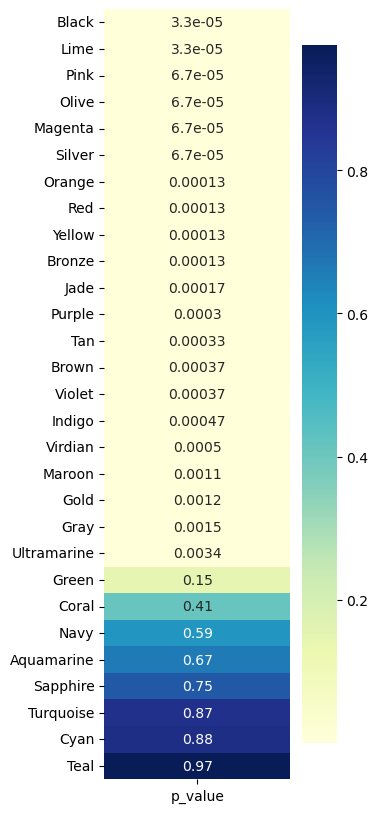

In [35]:
# Running a permutation test across colors
np.random.seed(0)
blue_clicks = df.T.Blue.values 
color_to_p_value = {}
for color, color_clicks in df_no_blue.items():
    p_value = permutation_test(blue_clicks, color_clicks)
    color_to_p_value[color] = p_value 
    
sorted_colors, sorted_p_values = zip(*sorted(color_to_p_value.items(),
                                             key=lambda x: x[1]))

plt.figure(figsize=(3, 10))
sns.heatmap([[p_value] for p_value in sorted_p_values],
            cmap='YlGnBu', annot=True, xticklabels=['p_value'],
            yticklabels=sorted_colors)
plt.show()

Most colors yield a p-value significantly lower than 0.05, with black showing the lowest p-value. This suggests that the ad-click percentages for black differ substantially from blue. However, from a design standpoint, black isn’t typically considered a clickable color—black text often blends in with regular text, making it less distinguishable as a link. Something seems off here. To investigate the difference between recorded clicks for black and blue, I’ll check by printing df_not_blue.Black.mean().

In [36]:
# Finding the mean click rate of black
mean_black = df_no_blue['Black'].mean()
print(f"Mean click rate of black is {mean_black}")

Mean click rate of black is 21.6


The mean click rate for black is 21.6, which is considerably lower than the blue mean of 28.35. This indicates that the statistical difference between these colors is due to fewer people clicking on black ads. It’s possible that other low p-values are also the result of lower click rates. To investigate further, I’ll filter out any colors with a mean click rate lower than blue’s and then print the remaining colors.

In [37]:
# Filtering colors with inferior click rates
remaining_colors = df[df.T.mean().values > blue_clicks.mean()].index
size = remaining_colors.size 
print(f"{size} colors have on average more clicks than Blue")
print("These colors are:")
print(remaining_colors.values)

5 colors have on average more clicks than Blue
These colors are:
['Sapphire' 'Navy' 'Teal' 'Ultramarine' 'Aquamarine']


Only five colors remain, and each of them is a different shade of blue. I’ll now print the sorted p-values for these remaining colors, along with their mean click rates for easier comparison and analysis.

In [38]:
# Printing the five remaining colors
for color, p_value in sorted(color_to_p_value.items(), key=lambda x: x[1]):
    if color in remaining_colors:
        mean = df_no_blue[color].mean()
        print(f"{color} has a p-value of {p_value} and a mean of {mean}")

Ultramarine has a p-value of 0.0034 and a mean of 34.2
Navy has a p-value of 0.5911666666666666 and a mean of 29.3
Aquamarine has a p-value of 0.6654666666666667 and a mean of 29.2
Sapphire has a p-value of 0.7457666666666667 and a mean of 28.9
Teal has a p-value of 0.9745 and a mean of 28.45


## Determining Statistical Significance

Four of the colors have large p-values, while only one has a small p-value: ultramarine, a unique shade of blue. Its mean click rate is 34.2, which is higher than blue’s mean of 28.35, and its p-value is 0.0034. But is this p-value statistically significant? It’s more than 10 times lower than the typical significance level of 0.05. However, this level doesn’t account for the fact that we compared blue to 29 other colors. Each comparison is essentially an experiment, and with enough tests, a low p-value is bound to appear by chance. To avoid this pitfall, we need to apply a Bonferroni correction, which adjusts the significance level to 0.05 / 29, preventing false positives from p-value hacking.

In [41]:
# Applying the Bonferroni correction
significance_level = 0.05/29
print(f"Adjusted significance level is {significance_level:.5f}")
if color_to_p_value['Ultramarine'] <= significance_level:
    print("Our p-value is statistically significant")
else:
    print("Our p-value is not statistically significant")

Adjusted significance level is 0.00172
Our p-value is not statistically significant


Our p-value is not statistically significant—Fred ran too many experiments for us to make a meaningful conclusion. Many of these experiments weren’t necessary. There’s no valid reason to expect that colors like black, brown, or gray would outperform blue. If Fred had excluded these irrelevant colors, our analysis might have been more productive. It’s possible that if Fred had limited his comparisons to the other five shades of blue, we might have found a statistically significant result. Let’s explore the hypothetical scenario where Fred conducts only five experiments and ultramarine’s p-value stays the same.

In [43]:
# Exploring a hypothetical significance level
hypothetical_sig_level = 0.05 / 5
print(f"Hypothetical significance level is {hypothetical_sig_level}")
if color_to_p_value['Ultramarine'] <= hypothetical_sig_level:
    print("Our p-value is statistically significant")
else:
    print("Our p-value is not statistically significant")

Hypothetical significance level is 0.01
Our p-value is statistically significant


Under these hypothetical conditions, our results would have been statistically significant. Unfortunately, we can’t rely on these hypothetical conditions to lower the significance level. There’s no guarantee that rerunning the experiments would yield the same p-value of 0.0034. P-values fluctuate, and unnecessary experiments increase the risk of unreliable fluctuations. Given the number of experiments Fred ran, we can’t draw a statistically significant conclusion.

However, not all is lost. Ultramarine still shows promise as a potential replacement for blue. Should Fred make the switch? It’s worth considering two scenarios. In the first scenario, the null hypothesis is true, meaning both blue and ultramarine have the same population mean. In this case, swapping ultramarine for blue won’t change the ad click rate. In the second scenario, ultramarine’s higher click rate is indeed statistically significant. If so, swapping blue for ultramarine would result in more clicks. So, Fred stands to gain without any downside by switching all his ads to ultramarine.

From a logical perspective, Fred should definitely swap blue for ultramarine. But even if he does, there will always be some uncertainty; Fred won’t know for sure if ultramarine truly generates more clicks than blue. If Fred’s curiosity gets the better of him and he wants a definitive answer, the only option is to run another experiment. In this new experiment, half the ads would be blue and the other half ultramarine. Fred’s software would track all the clicks and views. Afterward, we could recalculate the p-value and compare it to the standard significance level of 0.05, without needing a Bonferroni correction since only a single experiment would be conducted. This way, Fred would finally know whether ultramarine really outperforms blue.

## 41 shades of blue: A real-life cautionary tale

Fred initially thought that analyzing every single color would lead to more impactful insights, but he was mistaken. More data doesn’t always lead to better results; in fact, it can sometimes increase uncertainty.

Fred, however, isn’t a statistician, so it’s understandable that he didn’t grasp the pitfalls of overanalysis. Unfortunately, the same can’t be said for certain quantitative experts in the business world. One famous example comes from a well-known corporation that faced a similar dilemma when selecting a color for the web links on its site. The chief designer had picked a visually appealing shade of blue, but a top executive questioned the choice, wondering why that particular shade was selected over others.

Coming from a quantitative background, the executive believed the choice of link color should be determined scientifically through an extensive analytic test to find the “perfect” shade of blue. The company tested 41 different shades, assigning them randomly to web links, and gathered data from millions of clicks. Eventually, the “optimal” shade was chosen based on the highest click-through rate.

When the executive made this methodology public, statisticians worldwide cringed. The approach revealed a fundamental misunderstanding of statistics, and it ended up being an embarrassment for both the executive and the company.


## Summary

- More data isn’t always better. Running a pointless surplus of analytic tests increases the chance of anomalous results.
- It’s worth taking the time to think about a problem before running an analysis. If Fred had carefully considered the 31 colors, he would have realized that it was pointless to test them all. Many colors make ugly links. Colors like black are very unlikely to yield more clicks than blue. Filtering the color set would have led to a more informative test.
- Even though Fred’s experiment was flawed, we still managed to extract a useful insight. Ultramarine might prove to be a reasonable substitute for blue, though more testing is required. Occasionally, data scientists are presented with flawed data, but good insights may still be possible.